<a href="https://colab.research.google.com/github/23WH1A0522/AIML_IIITH/blob/main/AIML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [68]:
from google.colab import files

In [69]:
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [70]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [71]:
data.shape

(303, 14)

In [72]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [73]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [74]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

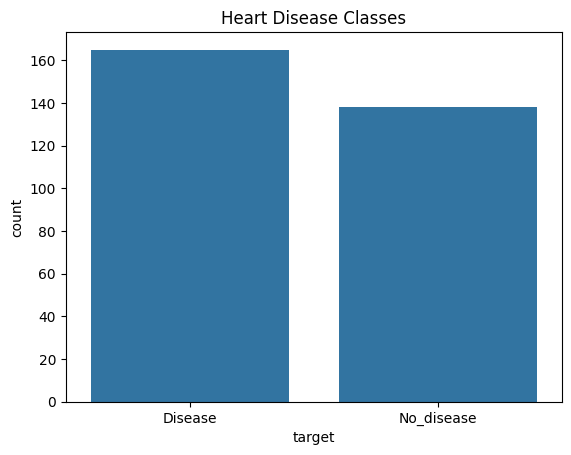

In [75]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

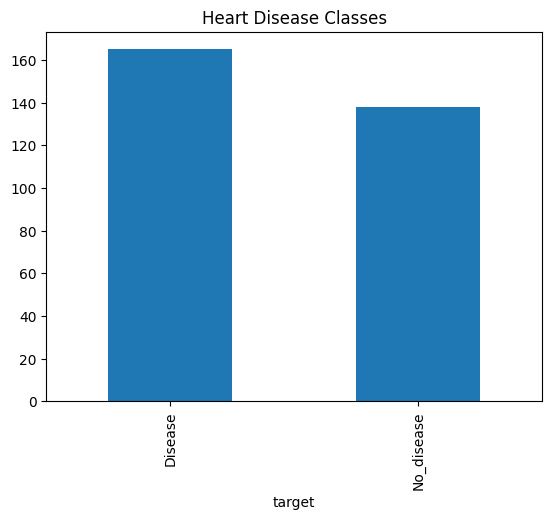

In [76]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Distribution of Participants by Sex')

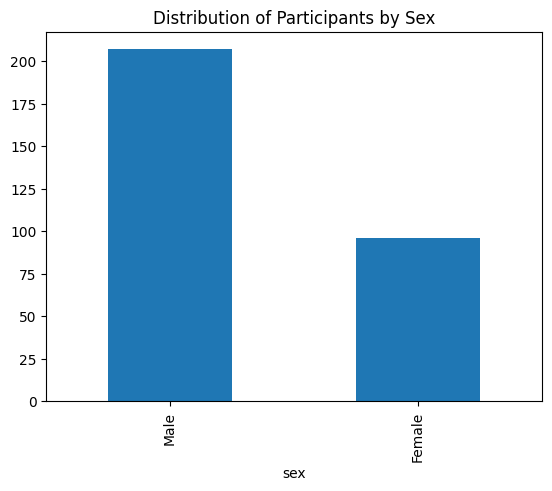

In [77]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

data['sex'].value_counts().plot(kind='bar').set_title('Distribution of Participants by Sex')



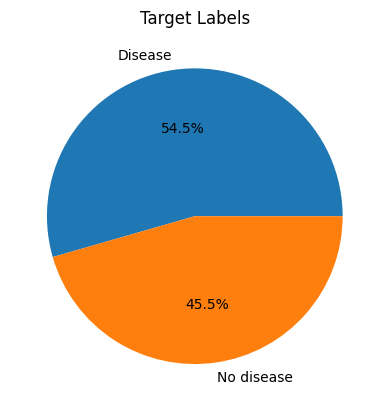

In [78]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

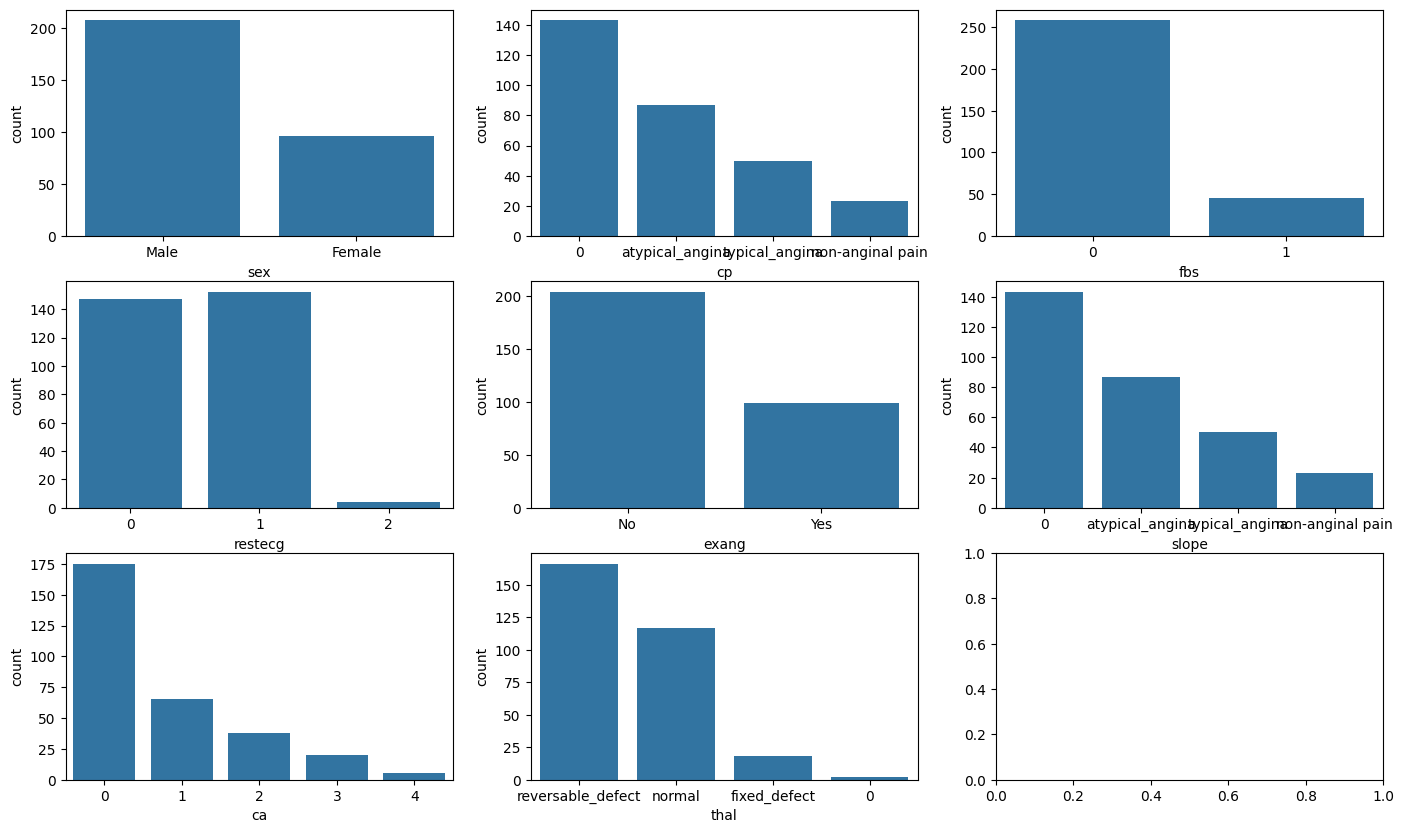

In [79]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

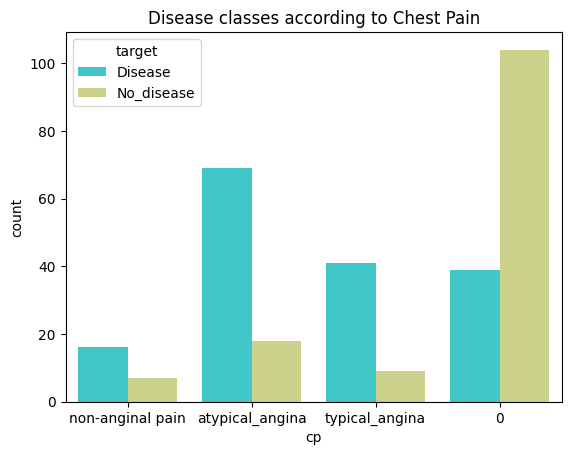

In [80]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

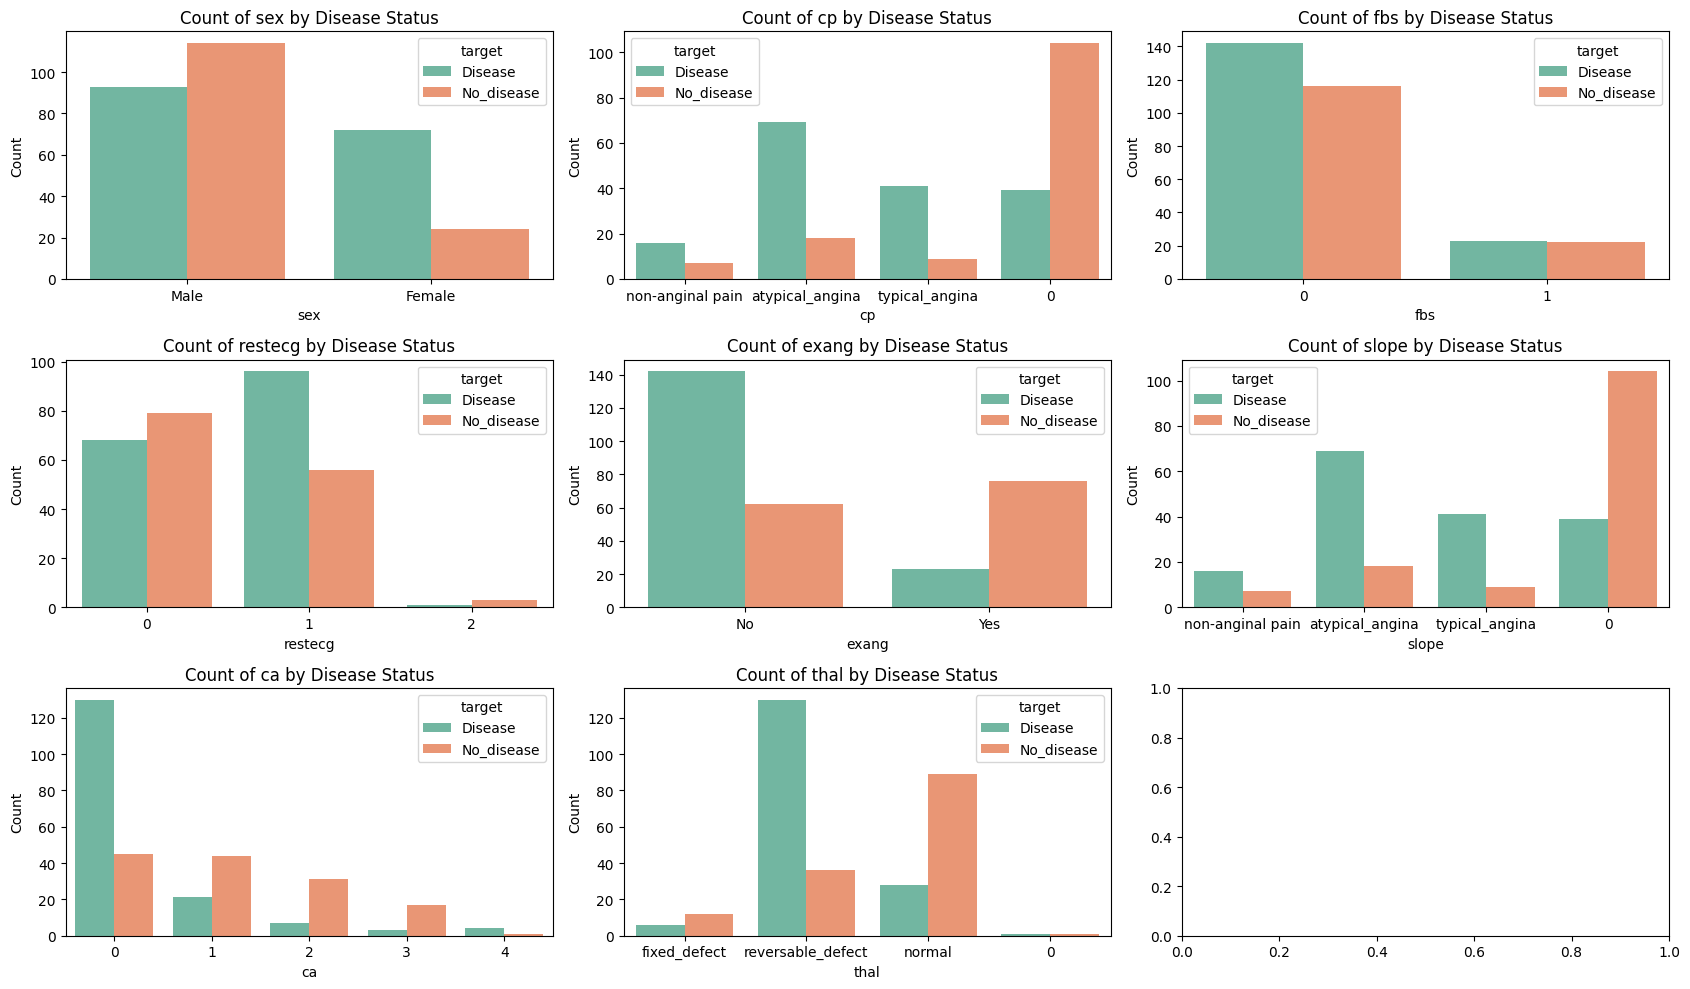

In [81]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(data=data, x=feature, hue='target', palette='Set2', ax=ax)
    ax.set_title(f'Count of {feature} by Disease Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


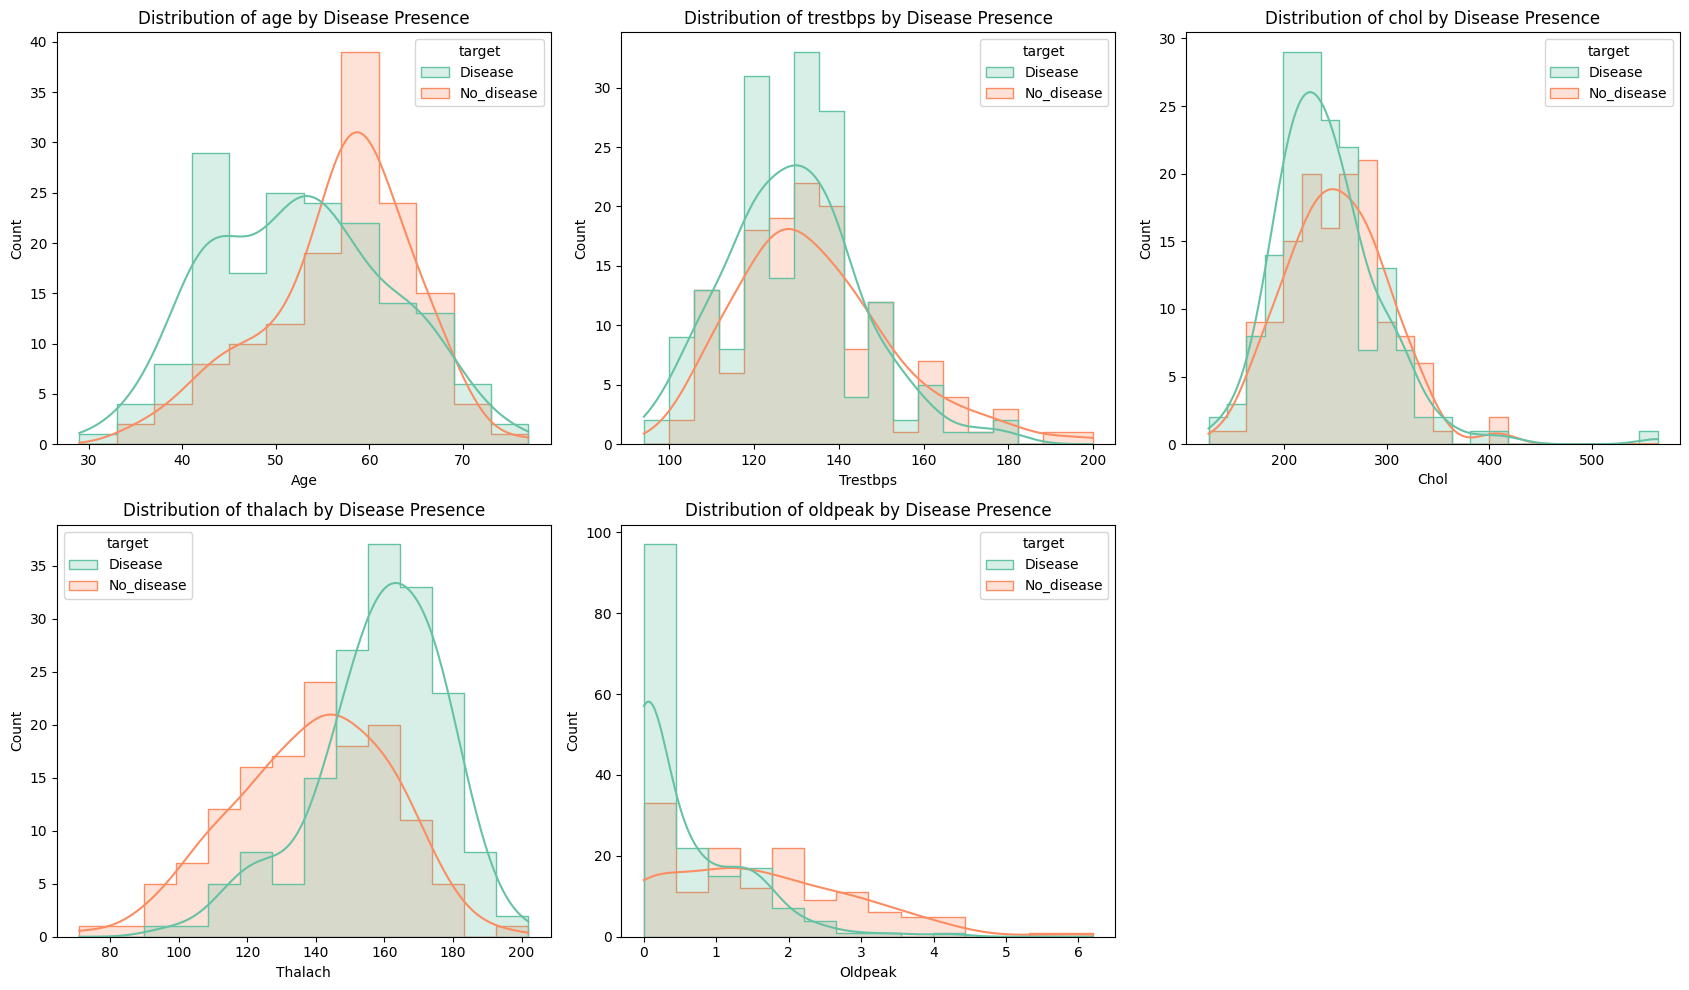

In [82]:
# Visualising the distribution of the continous variables

continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))

for idx, feature in enumerate(continuous_features):
    ax = axes[int(idx / 3), idx % 3]
    sns.histplot(data=data, x=feature, hue='target', kde=True, ax=ax, palette='Set2', element='step')
    ax.set_title(f'Distribution of {feature} by Disease Presence')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Count')

axes[1, 2].axis('off')


plt.tight_layout()
plt.show()

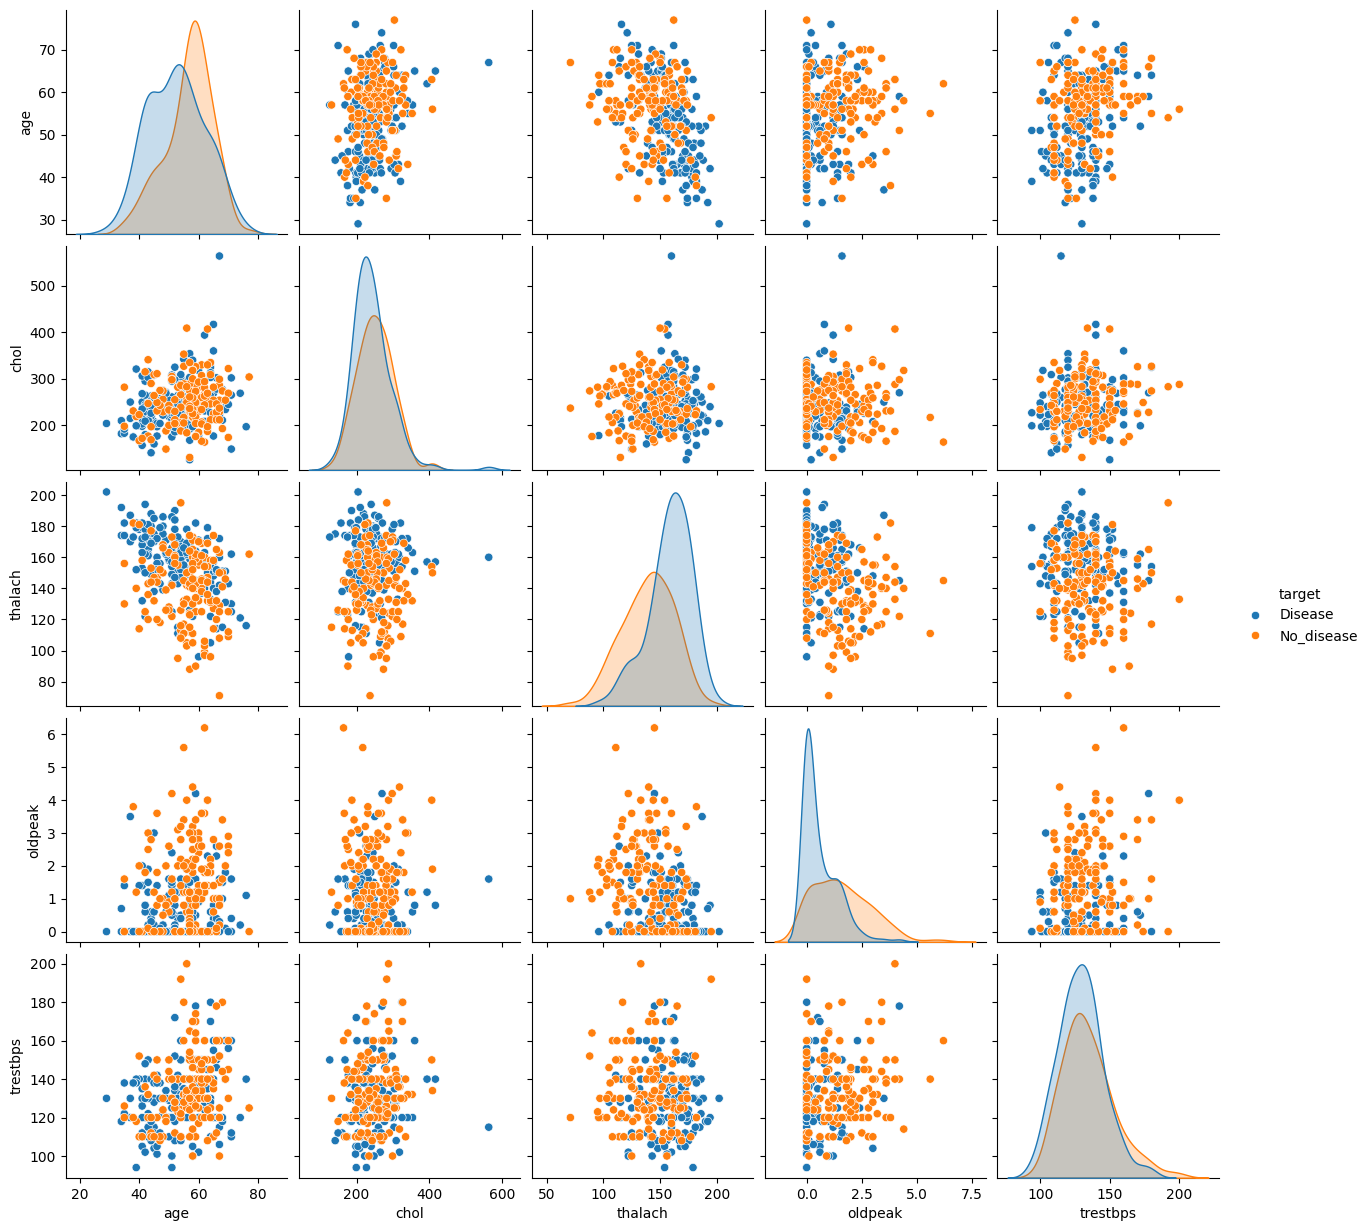

In [83]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

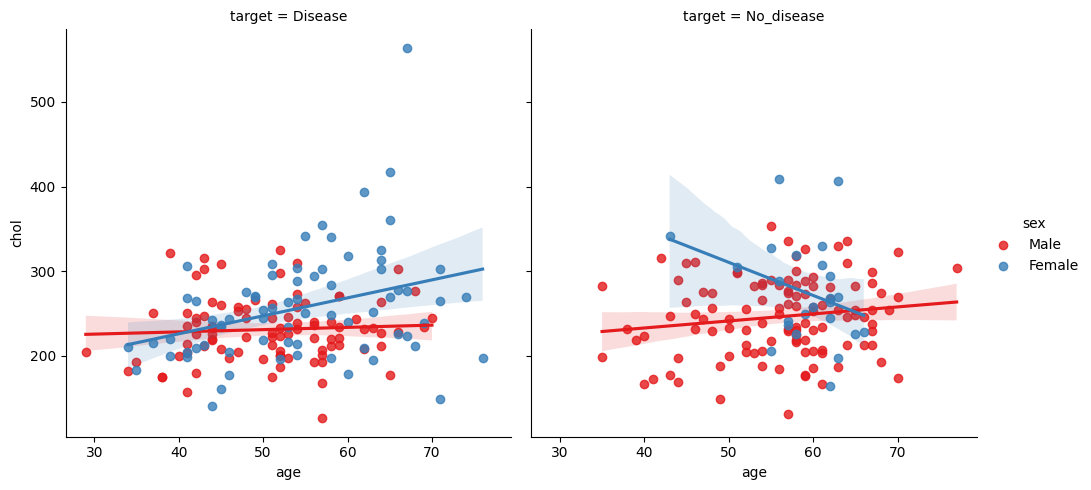

In [84]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

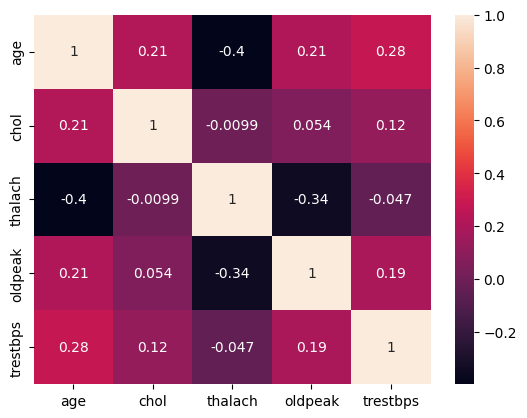

In [85]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

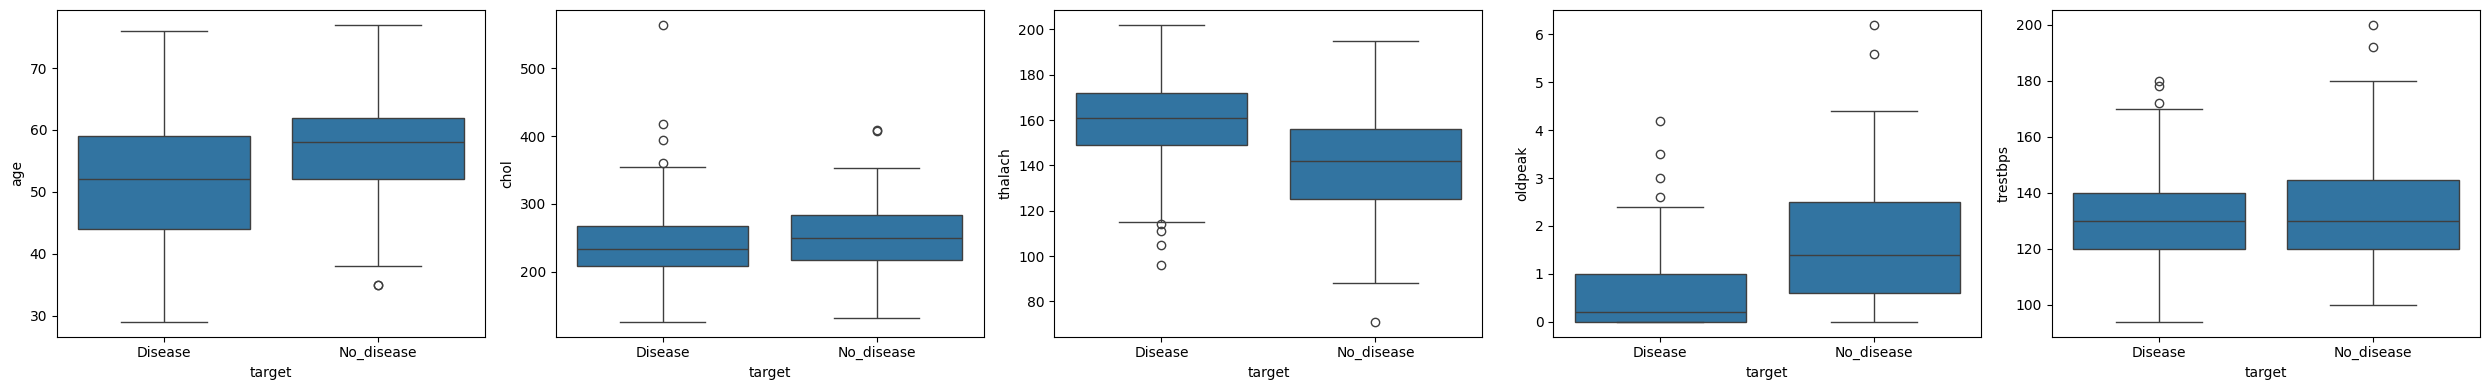

In [86]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

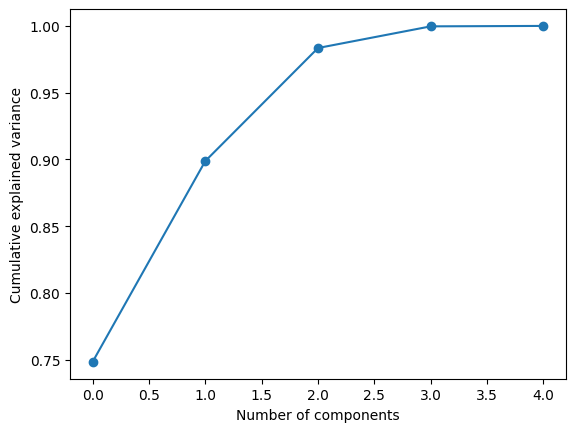

In [87]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


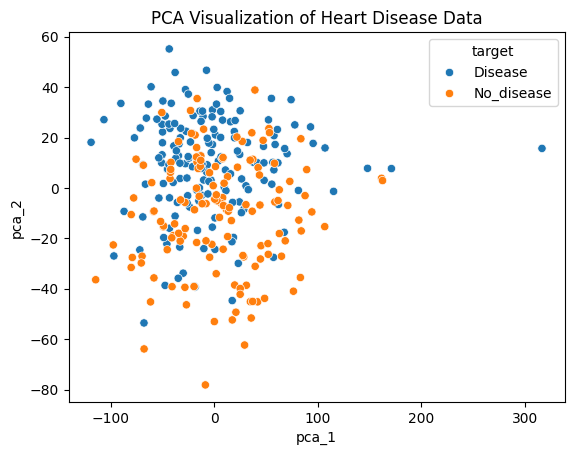

In [88]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


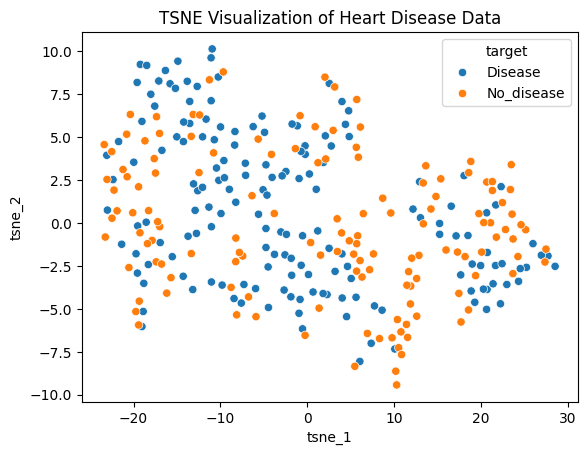

In [89]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [90]:
# 1. What is the percentage of Samples with Disease

disease_percentage = (data['target'].value_counts(normalize=True)[1] * 100).round(2)
print(f"Percentage of Samples with Disease: {disease_percentage}%")


Percentage of Samples with Disease: 45.54%


<ipython-input-90-3254f2bada06>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disease_percentage = (data['target'].value_counts(normalize=True)[1] * 100).round(2)


In [91]:
# 2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease
import scipy.stats as stats

cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

disease_data = data[data['target'] == 1]  # Assuming '1' indicates the presence of the disease
no_disease_data = data[data['target'] == 0]  # Assuming '0' indicates the absence of the disease

p_values = []

for feature in cont_features:
    disease_feature = disease_data[feature].dropna()
    no_disease_feature = no_disease_data[feature].dropna()
    _, p_value = stats.ttest_ind(disease_feature, no_disease_feature)
    p_values.append((feature, p_value))

sorted_p_values = sorted(p_values, key=lambda x: x[1])

print("Top 3 features with significant difference in distribution (lowest p-value):")
for feature, p_value in sorted_p_values[:3]:
    print(f"{feature}: p-value = {p_value:.4f}")


Top 3 features with significant difference in distribution (lowest p-value):
age: p-value = nan
trestbps: p-value = nan
chol: p-value = nan


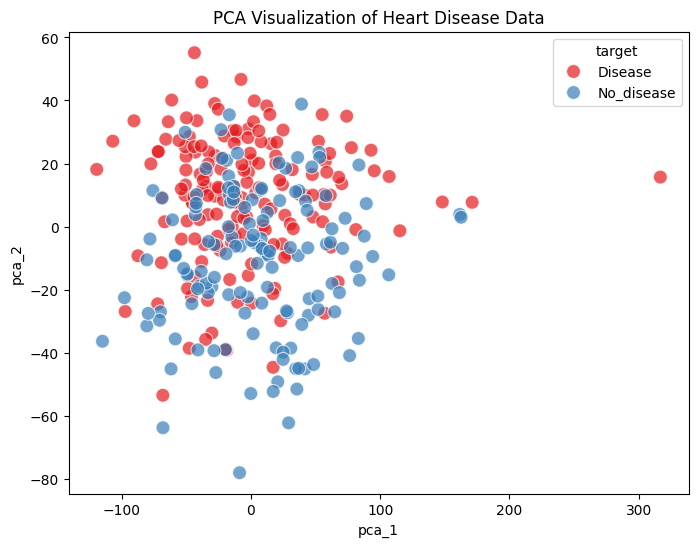

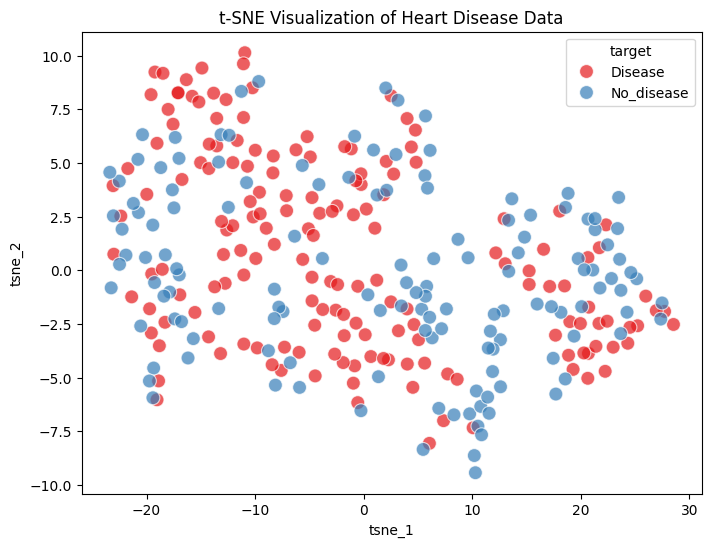

In [92]:
# 3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)

pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df, palette='Set1', s=100, alpha=0.7)
plt.title("t-SNE Visualization of Heart Disease Data")
plt.show()

In [93]:
# 4. What is the optimal number of principal components in our case

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.85) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 2


In [94]:
# 5. what are the continous features with the highest correation with each other?
correlation_matrix = data[cont_features].corr()

correlation_matrix = correlation_matrix.abs()
correlation_matrix = correlation_matrix.unstack()
correlation_matrix = correlation_matrix[correlation_matrix < 1]

highest_corr_pair = correlation_matrix.idxmax()
highest_corr_value = correlation_matrix.max()

print(f"The pair of continuous features with the highest correlation: {highest_corr_pair}")
print(f"Correlation value: {highest_corr_value:.4f}")


The pair of continuous features with the highest correlation: ('age', 'thalach')
Correlation value: 0.3985


Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [95]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (2).csv


In [96]:
data = pd.read_csv("star_nutri_expanded.csv")

In [97]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

In [98]:
#cleaning and filling the missing values in the data
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [99]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [100]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [102]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


In [103]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [104]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [105]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [106]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [107]:

data = data.replace({True: 1, False: 0})


<ipython-input-107-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [108]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-108-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [109]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

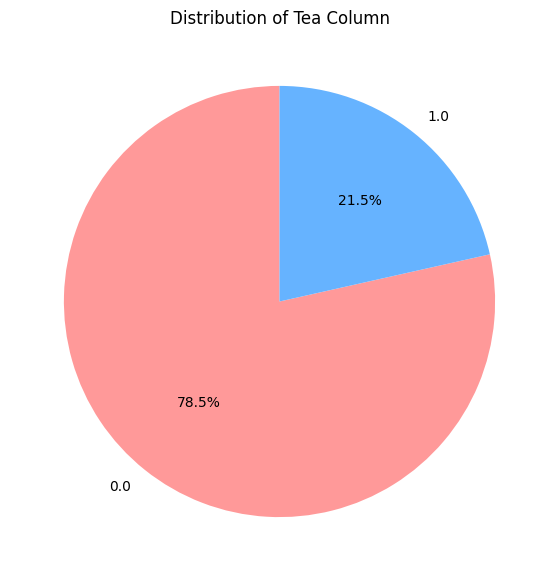

Observations:
Tea
0.0    190
1.0     52
Name: count, dtype: int64


In [111]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
import matplotlib.pyplot as plt
if 'Tea' in data.columns:
    tea_counts = data['Tea'].value_counts()
    plt.figure(figsize=(7, 7))
    tea_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title('Distribution of Tea Column')
    plt.ylabel('')
    plt.show()
    print(f"Observations:\n{tea_counts}")
else:
    print("The 'Tea' column is not found in the dataset.")



In [112]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

# Check the column names in the dataset
print(data.columns)
if 'target' in data.columns:
    features = data.drop('target', axis=1)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)
    pca = PCA(n_components=len(features.columns))
    pca.fit(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = explained_variance_ratio.cumsum()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', color='b')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()
    optimal_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.95) + 1
    print(f"The optimal number of principal components is {optimal_components}")
else:
    print("The 'target' column is not found in the dataset.")


Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)',
       'Tea', 'bev_Banana Chocolate Smoothie', 'bev_Brewed Coffee',
       'bev_Caffè Americano', 'bev_Caffè Latte',
       'bev_Caffè Mocha (Without Whipped Cream)', 'bev_Cappuccino',
       'bev_Caramel', 'bev_Caramel (Without Whipped Cream)',
       'bev_Caramel Apple Spice (Without Whipped Cream)',
       'bev_Caramel Macchiato', 'bev_Coffee', 'bev_Espresso',
       'bev_Hot Chocolate (Without Whipped Cream)',
       'bev_Iced Brewed Coffee (With Classic Syrup)',
       'bev_Iced Brewed Coffee (With Milk & Classic Syrup)', 'bev_Java Chip',
       'bev_Java Chip (Without Whipped Cream)', 'bev_Mocha',
       'bev_Mocha (Without Whipped Cream)', 'bev_Orange Mango Banana Smoothie',
       'bev_

In [113]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# Check the column names in the dataset
print(data.columns)
target_column = 'target'
if target_column in data.columns:
    features = data.drop(target_column, axis=1)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    data['PC1'] = pca_result[:, 0]
    data['PC2'] = pca_result[:, 1]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=data, palette='Set2', s=100)
    plt.title(f'PCA: First Two Principal Components (PC1 and PC2)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Disease Presence', loc='best')
    plt.grid(True)
    plt.show()
else:
    print(f"Target column '{target_column}' is not found in the dataset. Please check the column names.")


Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)',
       'Tea', 'bev_Banana Chocolate Smoothie', 'bev_Brewed Coffee',
       'bev_Caffè Americano', 'bev_Caffè Latte',
       'bev_Caffè Mocha (Without Whipped Cream)', 'bev_Cappuccino',
       'bev_Caramel', 'bev_Caramel (Without Whipped Cream)',
       'bev_Caramel Apple Spice (Without Whipped Cream)',
       'bev_Caramel Macchiato', 'bev_Coffee', 'bev_Espresso',
       'bev_Hot Chocolate (Without Whipped Cream)',
       'bev_Iced Brewed Coffee (With Classic Syrup)',
       'bev_Iced Brewed Coffee (With Milk & Classic Syrup)', 'bev_Java Chip',
       'bev_Java Chip (Without Whipped Cream)', 'bev_Mocha',
       'bev_Mocha (Without Whipped Cream)', 'bev_Orange Mango Banana Smoothie',
       'bev_

In [114]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
target_column = 'target'  # Adjust if needed
if target_column in data.columns:
    features = data.drop(target_column, axis=1)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)
    data['TSNE1'] = tsne_result[:, 0]
    data['TSNE2'] = tsne_result[:, 1]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue=target_column, data=data, palette='Set2', s=100)
    plt.title('t-SNE: First Two Components')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Disease Presence', loc='best')
    plt.grid(True)
    plt.show()

else:
    print(f"Target column '{target_column}' is not found in the dataset. Please check the column names.")


Target column 'target' is not found in the dataset. Please check the column names.


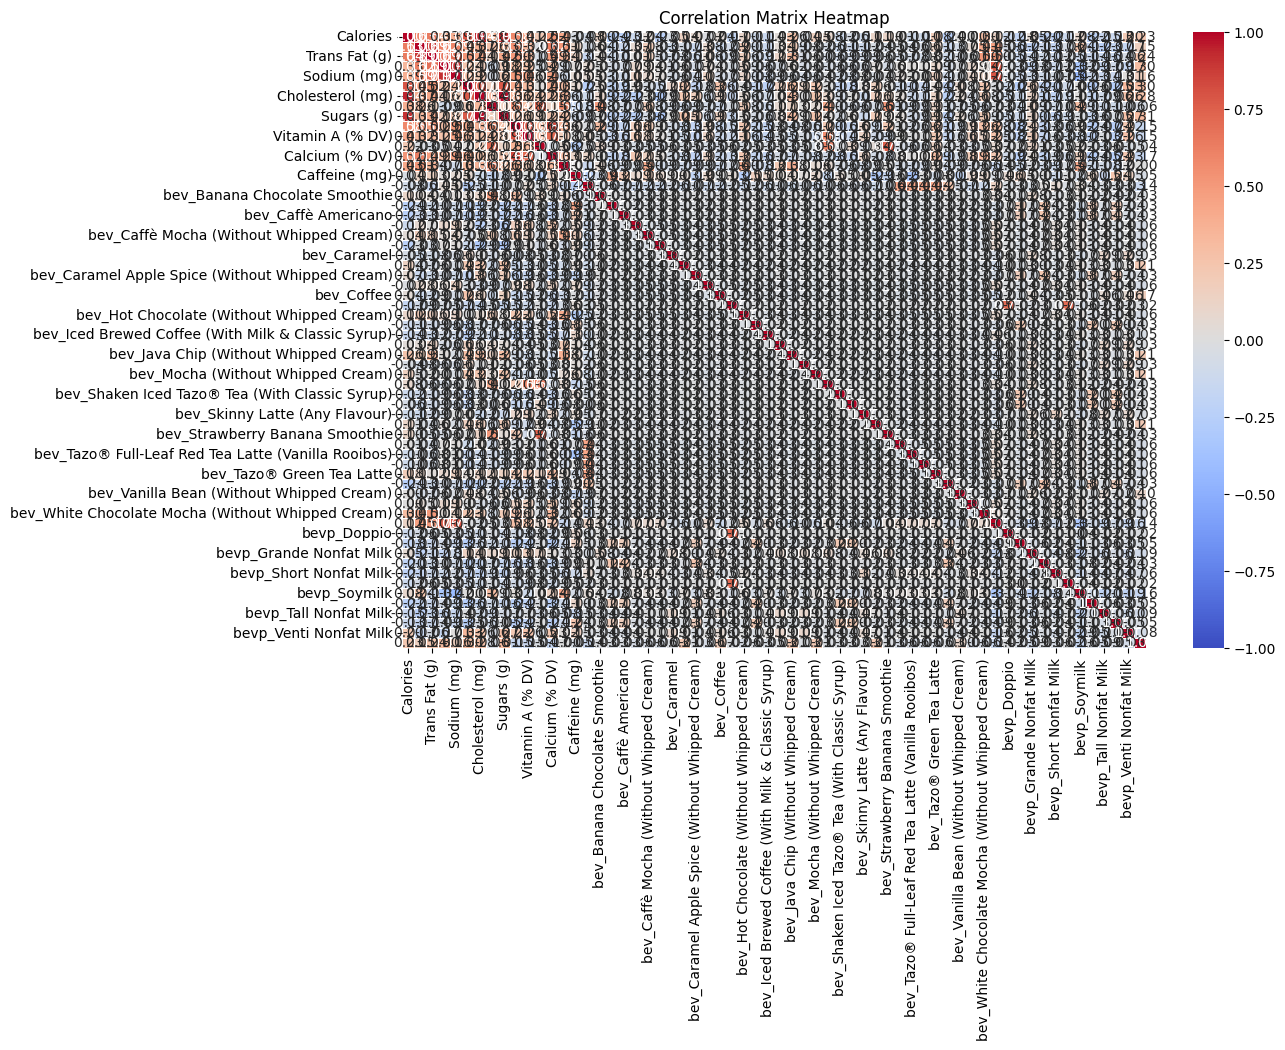

In [115]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-116-9890393b3d0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=col, data=data, palette='Set2')
<ipython-input-116-9890393b3d0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=col, data=data, palette='Set2')
<ipython-input-116-9890393b3d0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=col, data=data, palette='Set2')
<ipython-input-116-9890393b3d0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

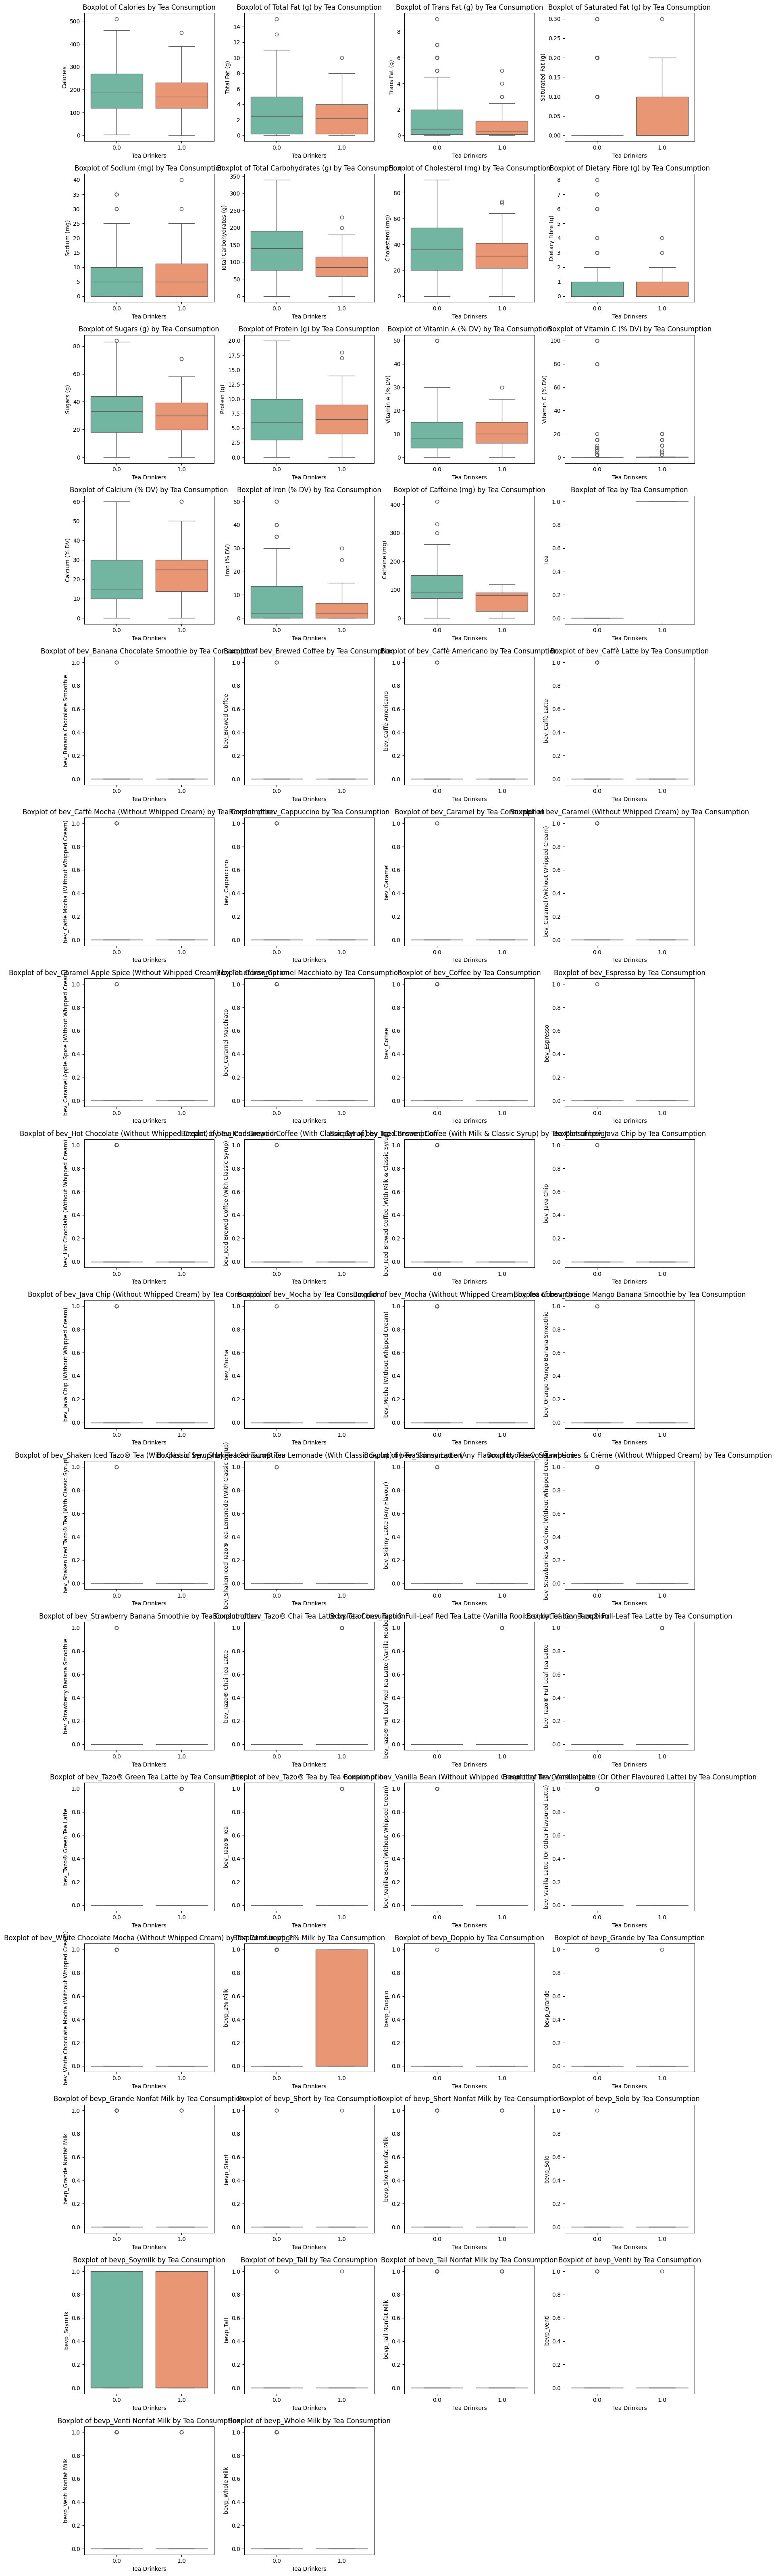

In [116]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = 4
num_rows = (len(numeric_cols) // num_cols) + (len(numeric_cols) % num_cols > 0)
plt.figure(figsize=(16, 4 * num_rows))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.boxplot(x='Tea', y=col, data=data, palette='Set2')
    plt.title(f'Boxplot of {col} by Tea Consumption')
    plt.xlabel('Tea Drinkers')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.